In [1]:
import numpy as np 
import pandas as pd
from PIL import Image
%matplotlib inline 
from matplotlib import pyplot as plt
import torch
from featurelearning.models.signet import SigNet
from preprocessing.normalize import crop_center
import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: {}'.format(device))

Using device: cuda


In [3]:
npz_dir = 'C:\\Users\\Mert\\Documents\\GitHub\\sigver\\gpds4k.npz'

In [4]:
with np.load(npz_dir, allow_pickle=True) as data:
        x, _, _, _, _ = data['x'], data['y'], data['yforg'], data['user_mapping'], data['filenames']

In [5]:
# Tempfix for too large dataset
# x = x[:int(x.shape[0]/10),:,:,:]

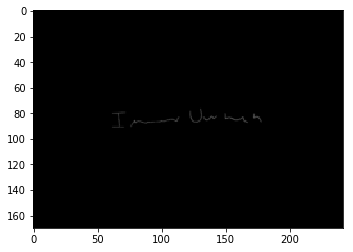

In [6]:
# Plot a sample
plt.imshow(x[2,0,:,:],cmap='gray',vmin=0,vmax=255)
plt.show()

In [7]:
state_dict, classification_layer, forg_layer = torch.load('saved_models/signet.pth')
base_model = SigNet().to(device).eval()
base_model.load_state_dict(state_dict)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

* Crop the middle 150x220

In [8]:
xc = np.zeros((x.shape[0],1,150,220), dtype=np.uint8)
for idx in tqdm.tqdm(np.arange(x.shape[0]),ascii=True):
    xc[idx,0,:,:] = crop_center(x[idx,0,:,:], (150,220))

100%|#######################################################################| 216000/216000 [00:03<00:00, 59434.07it/s]


In [9]:
del x 

In [10]:
with torch.no_grad():
    for gpu_slice in np.split(xc,200):
        features = base_model(torch.tensor(gpu_slice).float().div(255).to(device))